In [17]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 
%matplotlib inline

In [3]:
# Import "geojson" file for states in India
country_geo = r"C:\Users\Shruthi\Desktop\Exercise_6.3_Shruti_Garka\states_germany.json"

In [4]:
country_geo

'C:\\Users\\Shruthi\\Desktop\\Exercise_6.3_Shruti_Garka\\states_germany.json'

In [5]:
import json

f = open(r'C:\Users\Shruthi\Desktop\Exercise_6.3_Shruti_Garka\states_germany.json')

# returns JSON object as a dictionary
data = json.load(f)

# Iterating through the json list
for i in data['features']:
    print(i)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [6]:
path = r"C:\Users\Shruthi\Desktop\Exercise_6.3_Shruti_Garka"

In [7]:
# Importing the dataset
df= pd.read_csv(os.path.join(path, 'immo_data.csv', 'immo_data.csv'))

In [8]:
df.head()

regio1  serviceCharge                     heatingType  \
0  Nordrhein_Westfalen         245.00                 central_heating   
1      Rheinland_Pfalz         134.00  self_contained_central_heating   
2              Sachsen         255.00                   floor_heating   
3              Sachsen          58.15                district_heating   
4               Bremen         138.00  self_contained_central_heating   

  telekomTvOffer  telekomHybridUploadSpeed  newlyConst  balcony  picturecount  \
0  ONE_YEAR_FREE                       NaN       False    False             6   
1  ONE_YEAR_FREE                       NaN       False     True             8   
2  ONE_YEAR_FREE                      10.0        True     True             8   
3  ONE_YEAR_FREE                       NaN       False     True             9   
4            NaN                       NaN       False     True            19   

   pricetrend  telekomUploadSpeed  ...               regio2  \
0        4.62                10.0  ...             Dortmund   
1        3.47                10.0  ...    Rhein_Pfalz_Kreis   
2        2.72                 2.4  ...              Dresden   
3        1.53                40.0  ...  Mittelsachsen_Kreis   
4        2.46                 NaN  ...               Bremen   

                       regio3  \
0                     Schüren   
1              Böhl_Iggelheim   
2  Äußere_Neustadt_Antonstadt   
3                    Freiberg   
4           Neu_Schwachhausen   

                                         description  \
0  Die ebenerdig zu erreichende Erdgeschosswohnun...   
1  Alles neu macht der Mai – so kann es auch für ...   
2  Der Neubau entsteht im Herzen der Dresdner Neu...   
3  Abseits von Lärm und Abgasen in Ihre neue Wohn...   
4  Es handelt sich hier um ein saniertes Mehrfami...   

                                          facilities heatingCosts  \
0  Die Wohnung ist mit Laminat ausgelegt. Das Bad...          NaN   
1                                                NaN          NaN   
2  * 9 m² Balkon\n* Bad mit bodengleicher Dusche,...          NaN   
3                                                NaN        87.23   
4  Diese Wohnung wurde neu saniert und ist wie fo...          NaN   

   energyEfficiencyClass lastRefurbish  electricityBasePrice  \
0                    NaN           NaN                   NaN   
1                    NaN        2019.0                   NaN   
2                    NaN           NaN                   NaN   
3                    NaN           NaN                   NaN   
4                    NaN           NaN                   NaN   

   electricityKwhPrice   date  
0                  NaN  May19  
1                  NaN  May19  
2                  NaN  Oct19  
3                  NaN  May19  
4                  NaN  Feb20  

[5 rows x 49 columns]

In [9]:
df.shape

(268850, 49)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

Data wrangling

In [11]:
df.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'telekomHybridUploadSpeed', 'newlyConst', 'balcony', 'picturecount',
       'pricetrend', 'telekomUploadSpeed', 'totalRent', 'yearConstructed',
       'scoutId', 'noParkSpaces', 'firingTypes', 'hasKitchen', 'geo_bln',
       'cellar', 'yearConstructedRange', 'baseRent', 'houseNumber',
       'livingSpace', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat',
       'geo_plz', 'noRooms', 'thermalChar', 'floor', 'numberOfFloors',
       'noRoomsRange', 'garden', 'livingSpaceRange', 'regio2', 'regio3',
       'description', 'facilities', 'heatingCosts', 'energyEfficiencyClass',
       'lastRefurbish', 'electricityBasePrice', 'electricityKwhPrice', 'date'],
      dtype='object')

In [12]:
# Select only the necessary columns and put them in a list called columns
columns = ['regio1','pricetrend', 'totalRent', 'yearConstructed', 'serviceCharge', 'telekomUploadSpeed','baseRent', 'livingSpace', 'noRooms', 'regio3', 'heatingCosts', 'date']

In [18]:
df_1 = df[columns]

In [19]:
df_1.head()

regio1  pricetrend  totalRent  yearConstructed  serviceCharge  \
0  Nordrhein_Westfalen        4.62      840.0           1965.0         245.00   
1      Rheinland_Pfalz        3.47        NaN           1871.0         134.00   
2              Sachsen        2.72     1300.0           2019.0         255.00   
3              Sachsen        1.53        NaN           1964.0          58.15   
4               Bremen        2.46      903.0           1950.0         138.00   

   telekomUploadSpeed  baseRent  livingSpace  noRooms  \
0                10.0     595.0        86.00      4.0   
1                10.0     800.0        89.00      3.0   
2                 2.4     965.0        83.80      3.0   
3                40.0     343.0        58.15      3.0   
4                 NaN     765.0        84.97      3.0   

                       regio3  heatingCosts   date  
0                     Schüren           NaN  May19  
1              Böhl_Iggelheim           NaN  May19  
2  Äußere_Neustadt_Antonstadt           NaN  Oct19  
3                    Freiberg         87.23  May19  
4           Neu_Schwachhausen           NaN  Feb20

In [20]:
df_1.tail()

regio1  pricetrend  totalRent  yearConstructed  \
268845               Bayern        2.74      910.0           2016.0   
268846               Hessen        6.49     1150.0           1983.0   
268847               Hessen        2.90      930.0           1965.0   
268848  Nordrhein_Westfalen        4.39     1015.0           2019.0   
268849               Hessen        5.00        NaN           1972.0   

        serviceCharge  telekomUploadSpeed  baseRent  livingSpace  noRooms  \
268845           90.0                10.0     820.0         90.0      3.0   
268846          220.0                 NaN     930.0        115.0      3.5   
268847          220.0                40.0     650.0         95.0      4.0   
268848          175.0                 NaN     840.0         70.0      2.0   
268849          315.0                 NaN     935.0         77.0      3.0   

                     regio3  heatingCosts   date  
268845             Eberfing           NaN  Feb20  
268846            Viernheim           NaN  May19  
268847  Limburg_an_der_Lahn           NaN  Feb20  
268848            Dellbrück          40.0  May19  
268849           Sossenheim           NaN  Feb20

In [21]:
# Renaming columns
df2= df_1.rename(columns = {'regio1': 'State', 'serviceCharge': 'Service_charge', 'pricetrend': 'Price_trend', 'telekomUploadSpeed':'Internet_speed', 'totalRent':'Total_rent', 'yearConstructed':'Construction_year',  'baseRent':'Base_rent', 'livingSpace':'Size',  'noRooms':'No_of_Rooms', 'regio3':'City', 'heatingCosts':'Heating_costs', 'date': 'Date_posted'})

In [22]:
# Check for missing values
df2.isnull().sum()

State                     0
Price_trend            1832
Total_rent            40517
Construction_year     57045
Service_charge         6909
Internet_speed        33358
Base_rent                 0
Size                      0
No_of_Rooms               0
City                      0
Heating_costs        183332
Date_posted               0
dtype: int64

In [23]:
df2.head()

State  Price_trend  Total_rent  Construction_year  \
0  Nordrhein_Westfalen         4.62       840.0             1965.0   
1      Rheinland_Pfalz         3.47         NaN             1871.0   
2              Sachsen         2.72      1300.0             2019.0   
3              Sachsen         1.53         NaN             1964.0   
4               Bremen         2.46       903.0             1950.0   

   Service_charge  Internet_speed  Base_rent   Size  No_of_Rooms  \
0          245.00            10.0      595.0  86.00          4.0   
1          134.00            10.0      800.0  89.00          3.0   
2          255.00             2.4      965.0  83.80          3.0   
3           58.15            40.0      343.0  58.15          3.0   
4          138.00             NaN      765.0  84.97          3.0   

                         City  Heating_costs Date_posted  
0                     Schüren            NaN       May19  
1              Böhl_Iggelheim            NaN       May19  
2  Äußere_Neustadt_Antonstadt            NaN       Oct19  
3                    Freiberg          87.23       May19  
4           Neu_Schwachhausen            NaN       Feb20

In [24]:
# Impute missing values with mean

df2['Price_trend'].fillna(df2['Price_trend'].mean(), inplace=True)
df2['Total_rent'].fillna(df2['Total_rent'].mean(), inplace=True)
df2['Construction_year'].fillna(df2['Construction_year'].mean(), inplace=True)
df2['Service_charge'].fillna(df2['Service_charge'].mean(), inplace=True)
df2['Internet_speed'].fillna(df2['Internet_speed'].mean(), inplace=True)
df2['Heating_costs'].fillna(df2['Heating_costs'].mean(), inplace=True)

In [25]:
# Last check for NaN
df2.isnull().sum()

State                0
Price_trend          0
Total_rent           0
Construction_year    0
Service_charge       0
Internet_speed       0
Base_rent            0
Size                 0
No_of_Rooms          0
City                 0
Heating_costs        0
Date_posted          0
dtype: int64

In [26]:
# Check for duplicates
dups = df2.duplicated()

In [27]:
dups.shape

(268850,)

<Axes: xlabel='Base_rent', ylabel='Count'>

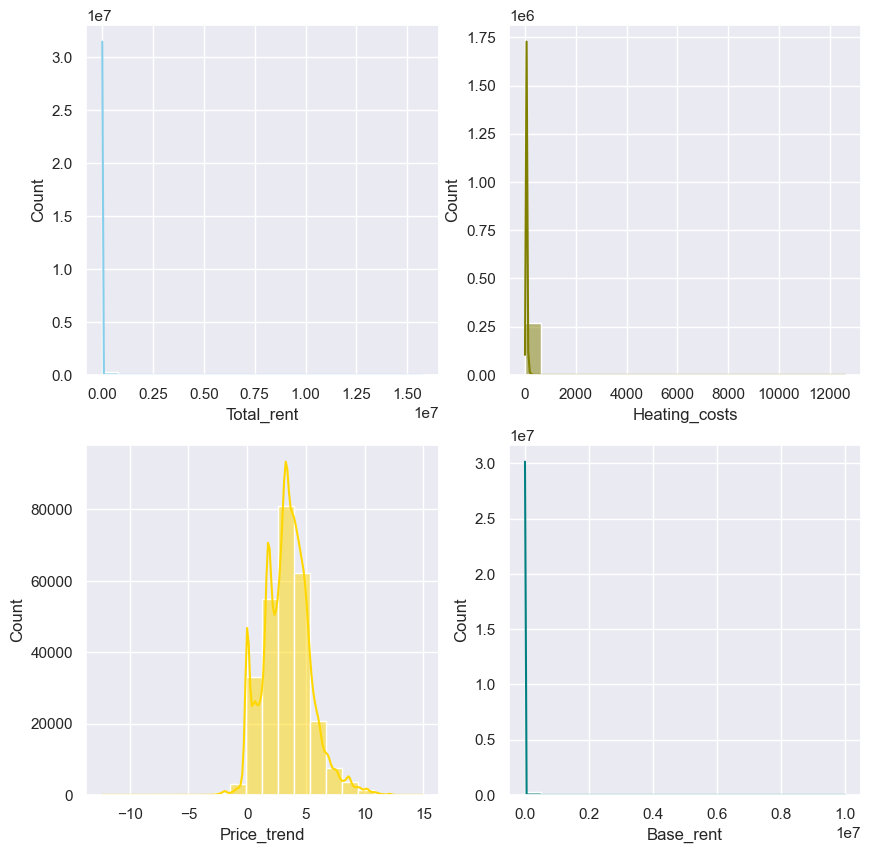

In [28]:
# Extreme values checks
# set a grey background (use sns.set_theme() 
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(df2['Total_rent'], bins=20, kde = True, color="skyblue", ax=axs[0, 0])
sns.histplot(df2['Heating_costs'], bins=20, kde = True, color="olive", ax=axs[0, 1])
sns.histplot(df2['Price_trend'], bins=20, kde = True, color="gold", ax=axs[1, 0])
sns.histplot(df2['Base_rent'], bins=20, kde = True, color="teal", ax=axs[1, 1])


In [29]:
df2.shape

(268850, 12)

In [30]:
df2.columns

Index(['State', 'Price_trend', 'Total_rent', 'Construction_year',
       'Service_charge', 'Internet_speed', 'Base_rent', 'Size', 'No_of_Rooms',
       'City', 'Heating_costs', 'Date_posted'],
      dtype='object')

Plotting Choropleth map

In [31]:
# Create a data frame with just the states and total rent

data_to_plot = df2[['State','Total_rent']]
data_to_plot.head()

State   Total_rent
0  Nordrhein_Westfalen   840.000000
1      Rheinland_Pfalz   901.331522
2              Sachsen  1300.000000
3              Sachsen   901.331522
4               Bremen   903.000000

In [32]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['State', 'Total_rent'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrRd', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Total_rent").add_to(map)
folium.LayerControl().add_to(map)

map

In [33]:
map.save('plot_data.html')

Hamburg has the highest rent in germany followed by Bremen, Hessen and Bayern.